# Binary classification example: classifying movie reviews

Work with the IMDB dataset, trying to classify positive and negative reviews.

## Loadig the dataset

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

`train_data` and `test_data` are list of reviews

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## Decoding reviews

In [0]:
offset = 3
word_to_id = imdb.get_word_index()
word_to_id = {k:v+offset for k, v in word_to_id.items()}
word_to_id['<PAD>'] = 0
word_to_id['<START>'] = 1
word_to_id['<UNK>'] = 2

id_to_word = {v:k for k, v in word_to_id.items()}

In [14]:
decoded_first_review = ' '.join([id_to_word[word_id] for word_id in train_data[0]])
print(decoded_first_review)

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

## Endcoding the data into a binary matrix

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = np.array(train_labels.astype('float32'))
y_test = np.array(test_labels.astype('float32'))

## Defining the model

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Defining validation data

In [0]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model

In [26]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 183us/step - loss: 0.5262 - acc: 0.7786 - val_loss: 0.3907 - val_acc: 0.8737
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.3158 - acc: 0.9021 - val_loss: 0.3085 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2348 - acc: 0.9245 - val_loss: 0.2822 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1798 - acc: 0.9423 - val_loss: 0.3131 - val_acc: 0.8766
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1472 - acc: 0.9529 - val_loss: 0.2780 - val_acc: 0.8900
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1228 - acc: 0.9611 - val_loss: 0.3008 - val_acc: 0.8863
Epoch 7/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0998 - acc: 0.9710 - val_loss: 0

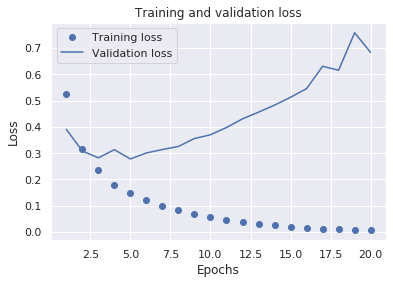

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, 21)

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

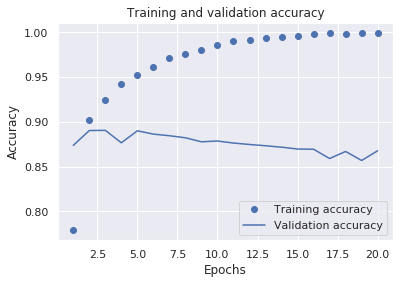

In [28]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Comments**: case of *overfitting*, we could stop the training after 4 epochs.

In [29]:
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.2308 - acc: 0.9466
Epoch 2/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.1417 - acc: 0.9594
Epoch 3/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.1104 - acc: 0.9674
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step


In [30]:
print(results)

[0.4968671940755844, 0.85936]


**Comments**: around 85% of accuracy for this naive approach. State-of-the-art around 95%.

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.3844 - acc: 0.8303
Epoch 2/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2192 - acc: 0.9141
Epoch 3/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.1748 - acc: 0.9344
Epoch 4/4
25000/25000 [==============================] - 2s 95us/step
[0.3390414175271988, 0.874]
